In [1]:
# import the numerical library
import numpy as np
# import signal processing library
import scipy.signal as sp
# import ploting library
import pylab as py
py.ion()
py.close('all')

# load the ecg signal
x = np.genfromtxt('ecg.dat')
# sampling frequency of the signal is 500 Hz
fs = 500
# generate correponding time vector
t = np.arange(len(x))/fs

In [2]:
# Compute the FFT of the signal
x_fft = np.fft.fft(x)
# Determine the frequency scale
f_fft = np.arange(len(x_fft))/len(x_fft)*fs

(0.0, 70.0)

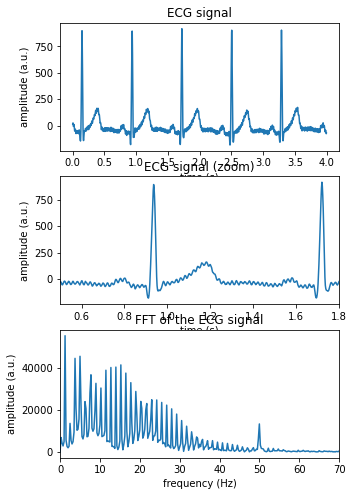

In [3]:
# plot the signal
py.figure(1, figsize=[5,8])
py.clf()
py.subplot(3,1,1)
py.plot(t, x)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal')
py.subplot(3,1,2)
py.plot(t, x)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal (zoom)')
py.xlim(0.5, 1.8), 
py.subplot(3,1,3)
py.plot(f_fft, abs(x_fft))
py.xlabel('frequency (Hz)')
py.ylabel('amplitude (a.u.)')
py.title('FFT of the ECG signal')
py.xlim(0,70)

Q: Comment the figures.  
A: In ECG signal (zoom), there are some small, high-frequency fluctuation, which might be the results of 50Hz perturbation. By looking at the FFT of ECG signal, there is a peak at 50Hz which is the 50Hz perturbation due to the power network.It highlights the strong presence of signal at 50 Hz that doesn't follow the decreasing trend of previous components.

(0.5, 1.8)

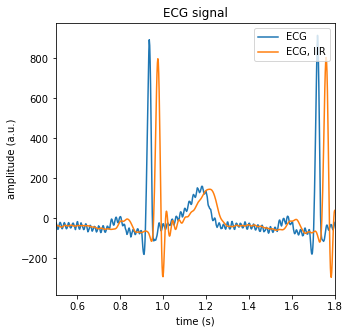

In [6]:
# Analogic limit of the passband frequency
f_pass = 35
# Analogic limit of the stopband frequency
f_stop = 50
# Convertion into Nyquist frequency
f_pass_N = f_pass/fs*2
f_stop_N = f_stop/fs*2
# Max attenutation in passband (dB)
g_pass = 3
# Min attenuation in stopband (dB)
g_stop = 40
# Determine the order and the cutoff frequency of a butterworth filter
ord, wn = sp.buttord(f_pass_N, f_stop_N, g_pass, g_stop)
# Compute the coeffcients of the filter
b, a = sp.butter(ord, wn)
# Filter the signal
x_f = sp.lfilter(b ,a, x)

py.figure(2, figsize=[5,5])
py.clf()
py.plot(t ,x, label='ECG')
py.plot(t, x_f, label='ECG, IIR')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal')
py.legend(loc='upper right')
py.xlim(0.5, 1.8)

Q: Comment the results (distorsion of the PQRST, delay, ...)  
A: PQRST shifts a little with IIR (or there is a delay about 0.05s), and amplitude is decreased by a small factor. But the pertubation caused by 50Hz is eleminated now. Also, we can see some distortion in yellow curve, curve has more negative value (the R part) than the original signal. There are some oscillations after S  
Q: Based on the FFT spectrum comment the selection of the pass and stop band frequencies.  
A: 35Hz almost includes all the information we need, and 50Hz is set to eliminate the perturbation in 50Hz. The reason why we don't set pass-band f to a larger value is to prevent severe distortion (ringing amplification). So 35Hz is a reasonable choice.

(0.5, 1.8)

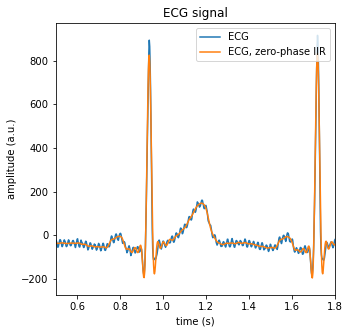

In [10]:
# Filter the signal
x_f = sp.filtfilt(b ,a, x)

py.figure(3, figsize=[5,5])
py.clf()
py.plot(t ,x, label='ECG')
py.plot(t, x_f, label='ECG, zero-phase IIR')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal')
py.legend(loc='upper right')
py.xlim(0.5, 1.8)


Q: Comment the results (distorsion of the PQRST, delay, ...).  
A: There is no delay this time, but there is still distortion, and amplitute changes. Also, there is no oscillation after R peak.

(0.5, 1.8)

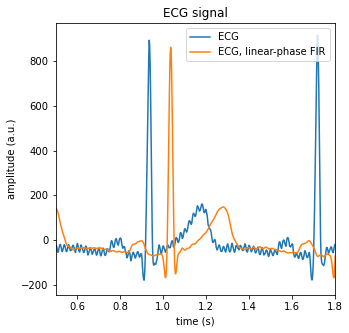

In [11]:
# length of the filter
l_fir = 101
# compute the filter coefficients using least square approach
b = sp.firls(l_fir, [0, f_pass_N, f_stop_N, 1], [1, 1, 1/100, 1/100])
a = [1]
# filter the signal
x_f = sp.lfilter(b, a, x)

py.figure(4, figsize=[5,5])
py.clf()
py.plot(t ,x, label='ECG')
py.plot(t, x_f, label='ECG, linear-phase FIR')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal')
py.legend(loc='upper right')
py.xlim(0.5, 1.8)

 Q: Comment the results (distorsion of the PQRST, delay, ...).  
 A: We can see clear delay after filtering, but the distortion is not as much as IIR filter, and also the amplitute changes much smaller. Linear phase filters permit a constant delay of all the components of a signal and this explains why distortion is much smaller.

Text(0.5, 1.0, 'Breathing signal')

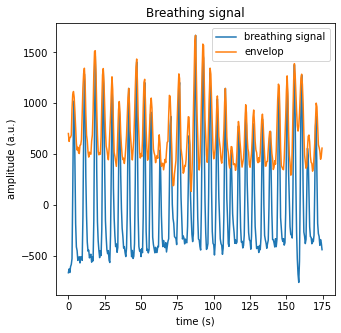

In [5]:
import pylab as py
py.ion()
py.close('all')

# load the ecg signal
x = np.genfromtxt('respiration.dat')
# sampling frequency of the signal is 500 Hz
fs = 2
# generate correponding time vector
t = np.arange(len(x))/fs

""" 
    The signal is a measurement of the breathing obtained by inductance
    plethysmography.

    The objective is to estimate the breathing frequency.
"""

""" 
    The Hilbert transforms permits to estimate the instaneous amplitude and
    phase of a narrow band signal. 

    Q: Comment the figures.
    Q: Why the envelope does no follow the maxima of the signal

"""

# compute the analytical signal of x (Hilbert transform)
xa = sp.hilbert(x)

# plot the signal
py.figure(1, figsize=[5,5])
py.clf()
py.plot(t, x, label='breathing signal')
py.plot(t, np.abs(xa), label='envelop')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.legend(loc='upper right')
py.title('Breathing signal')

(0.0, 2.0)

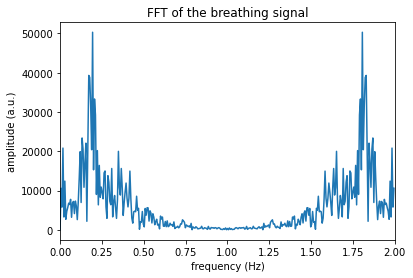

In [6]:
# Compute the FFT of the signal
x_fft = np.fft.fft(x)
# Determine the frequency scale
f_fft = np.arange(len(x_fft))/len(x_fft)*fs
py.plot(f_fft,abs(x_fft))
py.xlabel('frequency (Hz)')
py.ylabel('amplitude (a.u.)')
py.title('FFT of the breathing signal')
py.xlim(0,2)

Q: Comment the figures.  
A: The Hilbert enveloppe is not following exactly the maximum of the blue signal (the abs value).
Q: Why the envelope does no follow the maxima of the signal  
A: The raw breathing signal does not fullfil the requirement of narrow band. This is why envelope follows the absolute value. We also find there is a large band in the FFT of our signal.

E:\Anaconda\lib\site-packages\scipy\signal\filter_design.py:3595: RuntimeWarning: divide by zero encountered in true_divide
  nat = ((stopb ** 2 - passb[0] * passb[1]) /


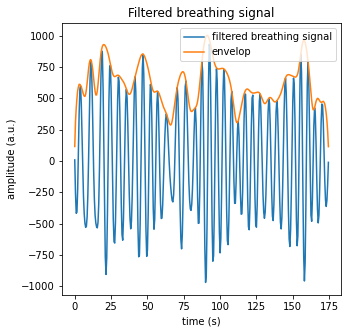

In [15]:
# Analogic limit of the passband frequency
f_pass = np.array([0.1, 0.25])
# Analogic limit of the stopband frequency
f_stop = np.array([0, 0.6])
# Convertion into Nyquist frequency
f_pass_N = f_pass/fs*2
f_stop_N = f_stop/fs*2
# Max attenutation in passband (dB)
g_pass = 3
# Min attenuation in stopband (dB)
g_stop = 40
# Determine the order and the cutoff frequency of a butterworth filter
ord, wn = sp.buttord(f_pass_N, f_stop_N, g_pass, g_stop)
# Compute the coeffcients of the filter
b, a = sp.butter(ord, wn, btype='band')
# Filter the signal
x_bp = sp.filtfilt(b ,a, x)

# Compute the Hilbert transform.
xa = sp.hilbert(x_bp)

py.figure(2, figsize=[5,5])
py.clf()
py.plot(t, x_bp, label='filtered breathing signal')
py.plot(t, np.abs(xa), label='envelop')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('Filtered breathing signal')
py.legend(loc='upper right')

Q: Comment the figures   
A: The filtered signal is much smoothier, fewer sharp transitions. The envelop curve follows the peaks of filtered signal in a more accurate manner.
Q: How is the estimation of the amplitude envelope.  
A: Although there are some peaks in the envelop curse which do not follow the peaks of filtered signal exactly, it is a good estimation roughly. After all, we cannot have ideal Hilbert Transform results in realy world.

Text(0, 0.5, 'instantaneous phase unwrapped (rad)')

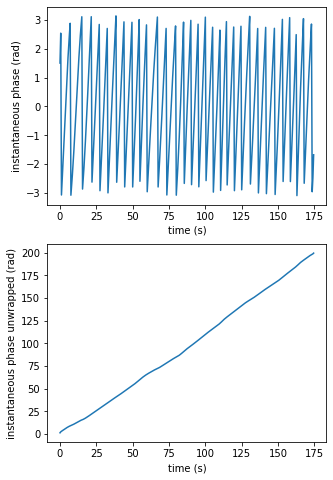

In [17]:
# estimate the instantaneous phase from the Hilbert transform
phi_xa = np.angle(xa)
# phase is bounded between -pi and pi -> reconstruct continuous signal
phi_xa_unw = np.unwrap(phi_xa)

py.figure(3, figsize=[5, 8])
py.clf()
py.subplot(2,1,1)
py.plot(t, phi_xa)
py.xlabel('time (s)')
py.ylabel('instantaneous phase (rad)')
py.subplot(2,1,2)
py.plot(t, phi_xa_unw)
py.xlabel('time (s)')
py.ylabel('instantaneous phase unwrapped (rad)')

Q: Comment the figure.    
A: First figure describes the phase of the signal between -pi and +pi. This graph is jumping' constantly : we notice a lot of discontinuity when the frequency should go 'above +pi'. Instead, the phase goes back to the [-pi;0] region. The second one is showing a graph that is close to a linear increase through time (but not totally, we have small variation). This represents the phase over time if not limited to the [-pi;pi] region.
Q: What is the role of the unwrap function  
A: The unwrap function is to precisely compute the true evolution of phase through time , and allows us to see the phase that is not limited to the range [-pi;pi]. This is how we notice that the phase is a close to a linear function of time. 

Text(0, 0.5, 'breathing rate (bpm)')

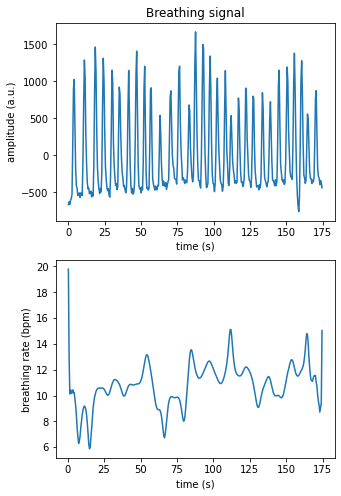

In [18]:
# compute the derivative of the phase (angular frequency).
d_phi = np.diff(phi_xa_unw)
# convert angular frequency to frequency.
d_phi /= 2*np.pi
# convert digital frequency to analog frequency and in breathing per minute
# (bpm)
d_phi *= fs*60

py.figure(4, figsize=[5,8])
py.clf()
py.subplot(2,1,1)
py.plot(t, x, label='breathing signal')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('Breathing signal')
py.subplot(2,1,2)
py.plot(t[1:], d_phi)
py.xlabel('time (s)')
py.ylabel('breathing rate (bpm)')


Q: Comment the figure.  
A; First graph is the breathing signal from question 1, which is a rythmic signal with amplitude evolution through time. The second one highlights the breathing rate, which is computed from the derivative of the previously computed unwrapped phase by multiplying the correct coefficient.  
Q: Compare the original waveform with the estimation of the breathing frequency  
A: The breathing rate resemble a little the envelope of the signal. This is a random effect of the signal, linked to the nature of the signal (breathing) rather than an intresic propert y of signals in general.

Text(0.5, 1.0, 'acceleration signal signal')

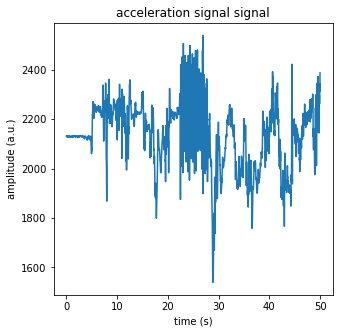

In [19]:
# import numerical processing library
"""
    The objective of this exercise is that you analyse the code provided and
    make the link with the curse. You have to provide a short report that
    comments and analyse the results. You can use directly the results or adapt
    them to you needs.

"""

# import the numerical library
import numpy as np
# import signal processing library
import scipy.signal as sp
# import ploting library
import pylab as py
py.ion()
py.close('all')

# load the ecg signal
x = np.genfromtxt('accel.dat')
# sampling frequency of the signal is 500 Hz
fs = 40
# generate correponding time vector
t = np.arange(len(x))/fs

""" 
    The signal is an acceleration signal measured at the wrist.

    The signal records the acceleration during the hand washing protocol in an
    hospital. The goal is to detect the hand washing sequence.

    The hand washing protocol produced rhythmical movements.

    The protocol is known to take place between 20 and 30 seconds.

"""

""" 
    Plot time signal.

    Q: Comment the figure.

"""

# Compute the FFT of the signal
x_fft = np.fft.fft(x)
# Determine the frequency scale
f_fft = np.arange(len(x_fft))/len(x_fft)*fs

# plot the signal
py.figure(1, figsize=[5,5])
py.clf()
py.plot(t, x)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('acceleration signal signal')

 Q: Comment the figure.  
 A: The signal consists of different types of amplitudes corresponding to hand movements. There is a very dense part in the signal (between 20 - 30s), which might be the result of moving at very high frequency. There are distinguishable spark parts in the signal, which can be used to distinguish different steps.  

(20.0, 30.0)

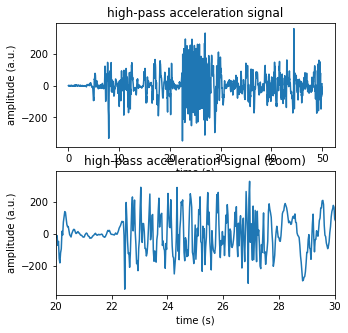

In [20]:

""" 
    High pass the signal.

    Q: Comment the figure.

"""

# high-pass filter with cutoff frequency of 0.5 Hz
b, a = sp.butter(4, 0.5/fs*2, btype='high')
# zero-phase filtering of the signal
x_hp = sp.filtfilt(b, a, x)

py.figure(2, figsize=[5,5])
py.clf()
py.subplot(2,1,1)
py.plot(t, x_hp)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('high-pass acceleration signal')
py.subplot(2,1,2)
py.plot(t, x_hp)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('high-pass acceleration signal (zoom)')
py.xlim(20, 30)

Q: Comment the figure.  
A: The first figure represents the signal with cut-off low frequencies (0.5 Hz) by applying high-pass filtering. The second figure represents the zooming of the same signal as above using knowledge the protocol is known to take place between 20 and 30 seconds. Zero-phase filter is applied to eliminate delay, and now we can a clear view of high frequencies. Low frequencies caused by noise are eliminated.

E:\Anaconda\lib\site-packages\scipy\signal\filter_design.py:3595: RuntimeWarning: divide by zero encountered in true_divide
  nat = ((stopb ** 2 - passb[0] * passb[1]) /


(20.0, 30.0)

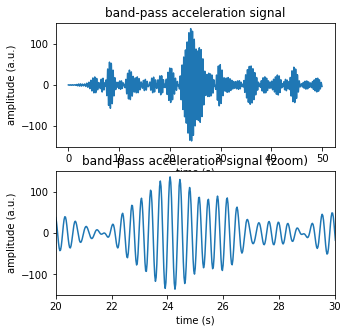

In [21]:
"""
    Band pass the signal between 2.4 and 3.2 Hz.

    Q: Based on previous figure, comment the selection of the frequencies.
    Q: Why zero phase filter (filtfilt) is used?


"""


# Analogic limit of the passband frequency
f_pass = np.array([2.4, 3.2])
# Analogic limit of the stopband frequency
f_stop = np.array([0, 5])
# Convertion into Nyquist frequency
f_pass_N = f_pass/fs*2
f_stop_N = f_stop/fs*2
# Max attenutation in passband (dB)
g_pass = 3
# Min attenuation in stopband (dB)
g_stop = 40
# Determine the order and the cutoff frequency of a butterworth filter
ord, wn = sp.buttord(f_pass_N, f_stop_N, g_pass, g_stop)
# Compute the coeffcients of the filter
b, a = sp.butter(ord, wn, btype='band')
# Filter the signal
x_bp = sp.filtfilt(b ,a, x_hp)

py.figure(3, figsize=[5,5])
py.clf()
py.subplot(2,1,1)
py.plot(t, x_bp)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('band-pass acceleration signal')
py.subplot(2,1,2)
py.plot(t, x_bp)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('band-pass acceleration signal (zoom)')
py.xlim(20, 30)

Q: Based on previous figure, comment the selection of the frequencies.  
A: The selected interval of frequencies is the optimal (the most narrow with less noises) frequency interval where could be the desired signal located.Looking at the previous figure we estimate that the human moving frequency is located in a period between 2.4 to 3.5Hz due to the medical washing protocol, people usually have the same frequency of hand movements using it.  
Q: Why zero phase filter (filtfilt) is used?
A: Zero phase filter allowed to remove any delay. The advantage of using the Zero phase filter, is that any kind linear filter can be used.

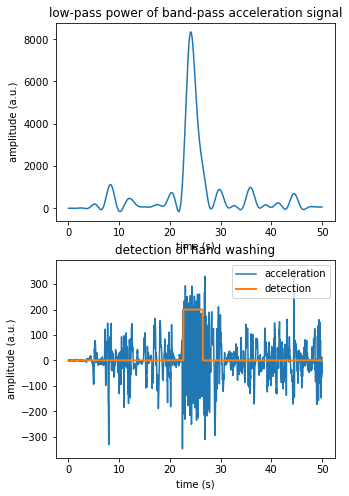

In [22]:
"""
    Low-pass filter of the power of the band-pass signal.

    Q: Why use the power of the acceleration signal?
    Q: How the detection of hand washing is obtained?

"""


# Analogic limit of the passband frequency
f_pass = 0.4
# Analogic limit of the stopband frequency
f_stop = 0.8
# Convertion into Nyquist frequency
f_pass_N = f_pass/fs*2
f_stop_N = f_stop/fs*2
# Max attenutation in passband (dB)
g_pass = 3
# Min attenuation in stopband (dB)
g_stop = 40
# Determine the order and the cutoff frequency of a butterworth filter
ord, wn = sp.buttord(f_pass_N, f_stop_N, g_pass, g_stop)
# Compute the coeffcients of the filter
b, a = sp.butter(ord, wn)
# Filter the signal
x_pow = sp.filtfilt(b ,a, x_bp**2)
# detection
det = x_pow > 2000

py.figure(4, figsize=[5,8])
py.clf()
py.subplot(2,1,1)
py.plot(t, x_pow)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('low-pass power of band-pass acceleration signal')
py.subplot(2,1,2)
py.plot(t, x_hp, label='acceleration')
py.plot(t, det*200, linewidth=2, label='detection')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('detection of hand washing')
py.legend(loc='upper right')


Q: Why use the power of the acceleration signal?  
A: We want to increase the difference between low f and high f. Taking the power of the acceleration signal allows to increase in the difference between low and high frequency.
Small frequencies will be a highly decreasing and vice versa.Example :
(0.02)^2 =0.0004, (2)^2 = 4     
Q: How the detection of hand washing is obtained?   
A: In the first figure, using the Butterworth filter allows dedicating frequency response that is as flat as possible in the passband. (Showen one pick with higher amplitude is located in intervals between nearly 24 to 27 seconds). It allows the detection of hand-washing movements in the raw signal.